In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,confusion_matrix
from ggplot import *

In [26]:
weather_data=pd.read_csv("./data/improved-dataset/turnstile_weather_v2.csv")

In [27]:
weather_data.columns

Index(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station',
       'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain',
       'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi',
       'meanwspdi', 'weather_lat', 'weather_lon'],
      dtype='object')

In [28]:
weather_data.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177


In [29]:
rain_data=weather_data.loc[weather_data["rain"]==1,:]
no_rain_data=weather_data.loc[weather_data["rain"]==0,:]

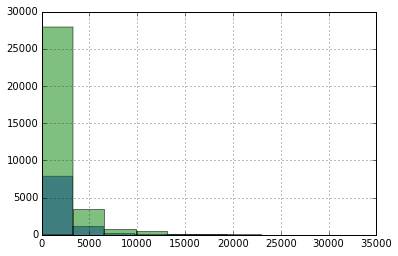

In [30]:
plt.figure()
rain_data["ENTRIESn_hourly"].hist(alpha=0.5)
no_rain_data["ENTRIESn_hourly"].hist(alpha=0.5)

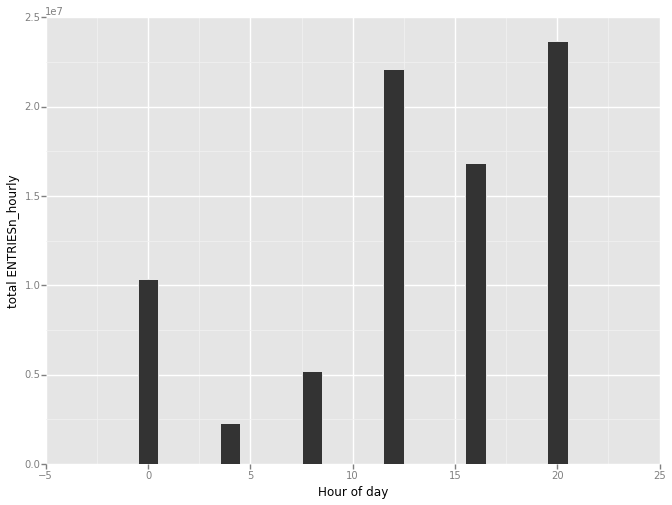

<ggplot: (278416809)>


In [31]:
mod_weather_data=weather_data[['UNIT','hour','ENTRIESn_hourly','EXITSn_hourly']]
grouped=mod_weather_data.groupby(['hour'],as_index=False)
summed_entries=grouped.sum()
plot=ggplot(summed_entries,aes(x='hour',y='ENTRIESn_hourly'))+scale_x_discrete()+\
         geom_bar(stat="identity")+xlab("Hour of day")+ylab("total ENTRIESn_hourly")
print(plot)

## Investigate colinearity between ```rain``` and ```weekday```

In [32]:
confusion_matrix(weather_data['rain'],weather_data['weekday'])

array([[10494, 22570],
       [ 1685,  7900]])

In [33]:
f1_score(weather_data['weekday'].astype(bool),~weather_data['rain'].astype(bool))

0.71048572417917966

In [34]:
import time

In [35]:
weather_data['count']=0
w=weather_data.groupby(['weekday','rain'],as_index=False)
w=w.count().loc[:,['weekday','rain','count']]
w

,weekday,rain,count
0,0,0,10494
1,0,1,1685
2,1,0,22570
3,1,1,7900


In [36]:
weather_data['count']=1
wp=weather_data.groupby(['weekday','rain'],as_index=False)
ws=wp.sum().loc[:,['weekday','rain','count']]
print(w)

   weekday  rain  count
0        0     0  10494
1        0     1   1685
2        1     0  22570
3        1     1   7900


In [40]:
wp.groups.keys()

dict_keys([(0, 1), (1, 0), (0, 0), (1, 1)])

In [44]:
weather_data.loc[wp.groups[(0,1)],:]

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon,count
72,R003,05-14-11,00:00:00,4404112,2921794,103,188,2011-05-14 00:00:00,0,5,...,1,57.0,8.1,0.000000,29.828000,59.540000,11.080000,40.700348,-73.887177,1
73,R003,05-14-11,04:00:00,4404132,2921853,20,59,2011-05-14 04:00:00,4,5,...,1,57.0,8.1,0.000000,29.828000,59.540000,11.080000,40.700348,-73.887177,1
74,R003,05-14-11,12:00:00,4404440,2921952,308,99,2011-05-14 12:00:00,12,5,...,1,62.6,17.3,0.000000,29.828000,59.540000,11.080000,40.700348,-73.887177,1
75,R003,05-14-11,16:00:00,4404651,2922087,211,135,2011-05-14 16:00:00,16,5,...,1,61.0,12.7,0.000000,29.828000,59.540000,11.080000,40.700348,-73.887177,1
76,R003,05-14-11,20:00:00,4404780,2922279,129,192,2011-05-14 20:00:00,20,5,...,1,60.1,9.2,0.000000,29.828000,59.540000,11.080000,40.700348,-73.887177,1
77,R003,05-15-11,00:00:00,4404846,2922418,66,139,2011-05-15 00:00:00,0,6,...,1,59.0,6.9,0.000000,29.636000,61.880000,9.220000,40.700348,-73.887177,1
78,R003,05-15-11,04:00:00,4404873,2922470,27,52,2011-05-15 04:00:00,4,6,...,1,55.4,9.2,0.000000,29.636000,61.880000,9.220000,40.700348,-73.887177,1
79,R003,05-15-11,12:00:00,4405087,2922548,214,78,2011-05-15 12:00:00,12,6,...,1,62.6,9.2,0.000000,29.636000,61.880000,9.220000,40.700348,-73.887177,1
80,R003,05-15-11,16:00:00,4405260,2922646,173,98,2011-05-15 16:00:00,16,6,...,1,69.8,10.4,0.000000,29.636000,61.880000,9.220000,40.700348,-73.887177,1
81,R003,05-15-11,20:00:00,4405370,2922792,110,146,2011-05-15 20:00:00,20,6,...,1,62.6,10.4,0.000000,29.636000,61.880000,9.220000,40.700348,-73.887177,1
